>> ### Correlation between news and stock movement for AMZN

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')

>>> #### Load data

In [2]:
stockData = pd.read_csv("./data/yfinance_data/AMZN_historical_data.csv")
newsData = pd.read_csv('./data/raw_analyst_ratings.csv')

In [3]:
newsData.head(10)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [4]:
stockData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
5,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,0.0,0.0
6,1997-05-23,0.070313,0.076042,0.066667,0.075000,0.075000,318744000,0.0,0.0
7,1997-05-27,0.075521,0.082292,0.072917,0.079167,0.079167,173952000,0.0,0.0
8,1997-05-28,0.081250,0.081771,0.076563,0.076563,0.076563,91488000,0.0,0.0
9,1997-05-29,0.077083,0.077083,0.073958,0.075260,0.075260,69456000,0.0,0.0


>>#### Normalize and Align Dates

In [5]:
from scripts.newsStockCorrelation import normalize_dates

newsData, stockData = normalize_dates(newsData, stockData)

>> #### Perform Sentiment Analysis

In [6]:
from scripts.newsStockCorrelation import analyze_sentiment
newsData = analyze_sentiment(newsData)

In [7]:
newsData.head(10)

,unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,0.00


>> #### Aggregate Sentiments by Date

In [8]:
from scripts.newsStockCorrelation import aggregate_sentiments
sentimentData = aggregate_sentiments(newsData)

In [9]:
sentimentData.head(10)

,date,sentiment
0,2009-02-14 00:00:00+00:00,0.000000
1,2009-04-27 00:00:00+00:00,0.000000
2,2009-04-29 00:00:00+00:00,0.000000
3,2009-05-22 00:00:00+00:00,0.000000
4,2009-05-27 00:00:00+00:00,0.234091
5,2009-05-29 00:00:00+00:00,0.068182
6,2009-05-30 00:00:00+00:00,0.118182
7,2009-06-01 00:00:00+00:00,0.000000
8,2009-06-02 00:00:00+00:00,0.000000
9,2009-06-05 00:00:00+00:00,0.083333


>> #### Calculate Daily Stock Returns

In [10]:
from scripts.newsStockCorrelation import calculate_stock_returns
stockData = calculate_stock_returns(stockData)

In [11]:
stockData.head(10)

,date,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,1997-05-15 00:00:00+00:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN
1,1997-05-16 00:00:00+00:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,-11.702769
2,1997-05-19 00:00:00+00:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,-1.204047
3,1997-05-20 00:00:00+00:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,-4.268472
4,1997-05-21 00:00:00+00:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,-12.739234
5,1997-05-22 00:00:00+00:00,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,0.0,0.0,-2.189084
6,1997-05-23 00:00:00+00:00,0.070313,0.076042,0.066667,0.075000,0.075000,318744000,0.0,0.0,7.462174
7,1997-05-27 00:00:00+00:00,0.075521,0.082292,0.072917,0.079167,0.079167,173952000,0.0,0.0,5.555997
8,1997-05-28 00:00:00+00:00,0.081250,0.081771,0.076563,0.076563,0.076563,91488000,0.0,0.0,-3.289250
9,1997-05-29 00:00:00+00:00,0.077083,0.077083,0.073958,0.075260,0.075260,69456000,0.0,0.0,-1.701869


>> #### Merge Datasets

In [12]:
from scripts.newsStockCorrelation import merge_datasets
mergedData = merge_datasets(sentimentData, stockData)

In [13]:
mergedData.head(10)

,date,sentiment,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2009-04-27 00:00:00+00:00,0.000000,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,-1.586548
1,2009-04-29 00:00:00+00:00,0.000000,4.1495,4.1495,3.9630,3.9895,3.9895,194702000,0.0,0.0,-3.167472
2,2009-05-22 00:00:00+00:00,0.000000,3.8050,3.8520,3.7510,3.7820,3.7820,69694000,0.0,0.0,-0.421275
3,2009-05-27 00:00:00+00:00,0.234091,3.9255,3.9750,3.8375,3.8550,3.8550,111342000,0.0,0.0,-1.645620
4,2009-05-29 00:00:00+00:00,0.068182,3.8860,3.9005,3.8200,3.8995,3.8995,101444000,0.0,0.0,0.437861
5,2009-06-01 00:00:00+00:00,0.000000,3.9105,4.2400,3.8745,4.1525,4.1525,215930000,0.0,0.0,6.488018
6,2009-06-02 00:00:00+00:00,0.000000,4.1210,4.2725,4.1050,4.2465,4.2465,187940000,0.0,0.0,2.263693
7,2009-06-05 00:00:00+00:00,0.083333,4.3145,4.3975,4.2650,4.3780,4.3780,165270000,0.0,0.0,2.385401
8,2009-06-08 00:00:00+00:00,0.218182,4.3375,4.3590,4.2555,4.3180,4.3180,112042000,0.0,0.0,-1.370488
9,2009-06-09 00:00:00+00:00,0.000000,4.3465,4.3835,4.3085,4.3540,4.3540,89502000,0.0,0.0,0.833725


>> #### Correlation Analysis

In [14]:
from scripts.newsStockCorrelation import correlation_analysis


correlation, p_value = correlation_analysis(mergedData)
print(f"Pearson Correlation: {correlation:.2f}, P-value: {p_value:.4f}")

Pearson Correlation: 0.01, P-value: 0.6717


>> #### Visualization

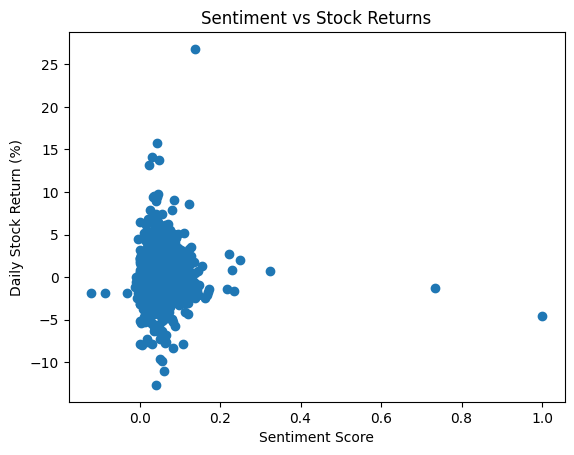

In [15]:
from scripts.newsStockCorrelation import plot_correlation

plot_correlation(mergedData)